In [1]:
import pandas as pd
sp500 = pd.read_csv('sp500.csv', index_col='Date')  

In [2]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-11-11,6008.859863,6017.310059,5986.689941,6001.350098,4333000000,5983.990234,0
2024-11-12,6003.600098,6009.919922,5960.080078,5983.990234,4243400000,5985.379883,1
2024-11-13,5985.750000,6008.189941,5965.910156,5985.379883,4220180000,5949.169922,0


In [3]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100,random_state=1)

train = sp500[0:-100]
test = sp500[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]

In [4]:
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [5]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [6]:
preds = pd.Series(preds, index=test.index)

In [7]:
precision_score(test["Target"], preds)

np.float64(0.6590909090909091)

<Axes: xlabel='Date'>

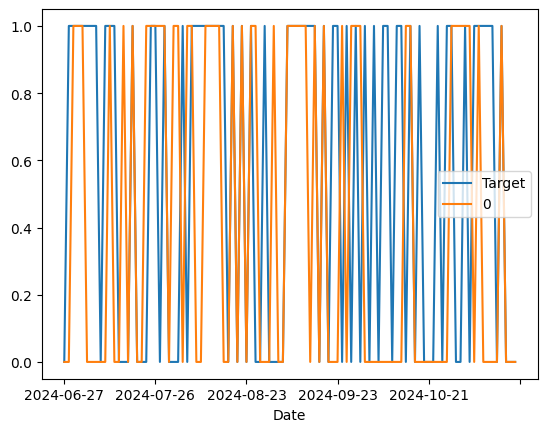

In [8]:
combined = pd.concat([test["Target"], preds], axis = 1)
combined.plot()